In [ ]:
"""
To Analyze the 


"""

In [1]:
from os import sys
sys.path.append("/meshAfterParty/")
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from importlib import reload

import dimensionality_reduction_utils as dr
import clustering_utils as cl
dr = reload(dr)
cl = reload(cl)
import pandas_utils as pu

from sklearn.preprocessing import StandardScaler
import time
from collections import Counter
import copy
np.set_printoptions(suppress=True)

In [11]:
from sklearn import mixture

# Importing the Data

In [3]:
df = pd.read_pickle("neuron_dendrite_path_data")
df_filtered = pu.filter_away_nan_rows(df)

# Get the distribution of the limb starts 

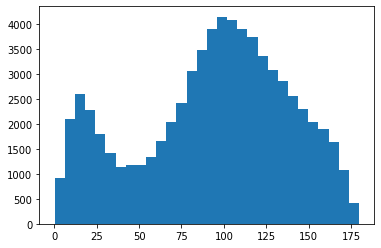

In [4]:
soma_angles =df_filtered[::4]["soma_angle"].to_numpy()
bin_data = plt.hist(soma_angles,bins=30)

# Extracting the Vectors we want to process (not excluding the soma angle)

In [5]:
columns_picked = df_filtered.columns[6:].to_numpy()
columns_picked

array(['n0_width_median_mesh_center',
       'n0_width_no_spine_median_mesh_center', 'n0_n_spines',
       'n0_total_spine_volume', 'n0_spine_volume_median',
       'n0_spine_volume_density', 'n0_skeletal_length', 'n0_parent_angle',
       'n0_sibling_angle', 'n1_width_median_mesh_center',
       'n1_width_no_spine_median_mesh_center', 'n1_n_spines',
       'n1_total_spine_volume', 'n1_spine_volume_median',
       'n1_spine_volume_density', 'n1_skeletal_length', 'n1_parent_angle',
       'n1_sibling_angle'], dtype=object)

In [6]:
# Scaling the Data
df_data = df_filtered[columns_picked].to_numpy()
scaler = StandardScaler()
df_data_scaled = scaler.fit_transform(df_data)

#df_data_reversed = scaler.inverse_transform(df_data_scaled,copy=True)

data_df_normalized = pd.DataFrame(df_data_scaled)
#add on the columns
data_df_normalized.columns = columns_picked
data_df_normalized

,n0_width_median_mesh_center,n0_width_no_spine_median_mesh_center,n0_n_spines,n0_total_spine_volume,n0_spine_volume_median,n0_spine_volume_density,n0_skeletal_length,n0_parent_angle,n0_sibling_angle,n1_width_median_mesh_center,n1_width_no_spine_median_mesh_center,n1_n_spines,n1_total_spine_volume,n1_spine_volume_median,n1_spine_volume_density,n1_skeletal_length,n1_parent_angle,n1_sibling_angle
0,-1.307408,-1.211303,-0.563713,-0.393487,-0.820227,-0.348209,-0.658634,-0.555927,2.580471,0.081006,0.289593,-0.593209,-0.622582,0.357911,-0.830670,0.882914,-1.052724,0.656866
1,-1.307408,-1.211303,-0.563713,-0.393487,-0.820227,-0.348209,-0.658634,-0.555927,2.580471,-1.312900,-1.230876,-0.752970,-0.732427,-0.901012,-0.917901,-0.616442,1.497255,0.656866
2,-1.935280,-1.841565,-0.563713,-0.393487,-0.820227,-0.348209,-0.591251,3.478030,2.580471,-1.394242,-1.319978,-0.752970,-0.732427,-0.901012,-0.917901,-0.792687,-0.475669,-1.742013
3,-1.935280,-1.841565,-0.563713,-0.393487,-0.820227,-0.348209,-0.591251,3.478030,2.580471,-1.534974,-1.474135,-0.752970,-0.732427,-0.901012,-0.917901,-0.778347,-1.384062,-1.742013
4,-0.312965,-0.213075,-0.563713,-0.393487,-0.820227,-0.348209,-0.459840,-0.177505,-1.244099,0.504117,0.227209,1.004394,0.705289,0.179588,0.621027,0.410959,-0.862051,-0.974313
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278287,0.253897,0.355945,-0.563713,-0.393487,-0.820227,-0.348209,-0.793917,0.329122,1.425331,-0.159848,0.032174,-0.513329,-0.552690,0.338898,-0.468013,-0.365497,1.562012,0.739752
278288,-0.126348,-0.025747,-0.437556,-0.309463,0.513432,-0.199089,-0.270056,1.352386,1.425331,0.115213,0.003587,0.245533,0.498456,0.372328,0.318889,0.499524,-1.399172,-0.753286
278289,-0.126348,-0.025747,-0.437556,-0.309463,0.513432,-0.199089,-0.270056,1.352386,1.425331,0.035701,-0.024399,0.285473,-0.003151,-0.399218,-0.382360,1.031757,0.646782,-0.753286
278290,-0.525829,-0.503808,0.887093,0.578067,-0.179997,0.142657,1.191045,1.376693,-0.934671,-1.387596,-1.312697,-0.752970,-0.732427,-0.901012,-0.917901,-0.804355,2.144463,1.211276


# Helper Function for GMM classification

In [92]:
def gmm_classification(gmm_model,curr_data,
                       classification="hard",
                       verbose=True,
                       return_counts=True,
                      ):
    
    probs = gmm_model.predict_proba(curr_data)
    if classification == "soft":
        count_values = np.sum(probs,axis=0)
    elif classification == "hard":
        gmm_class = np.argmax(probs,axis=1)
        counter_obj = Counter(gmm_class)
        count_values = []
        for clust_idx in range(model.n_components):
            if clust_idx in counter_obj.keys():
                count_values.append(counter_obj[clust_idx])
            else:
                count_values.append(0)
        count_values = np.array(count_values)
    if verbose:
        sorted_cluster_values = np.flip(np.argsort(count_values))
        print(f"Classification: {dict([(k,np.round(count_values[k],2)) for k in sorted_cluster_values])}")
    
    return count_values

gmm_classification(model,data_total_scaled,classification="soft")

Classification: {0: 100713.07, 1: 78692.12, 2: 77089.7, 3: 21797.11}


array([100713.06651972,  78692.11567267,  77089.70456086,  21797.11324674])

# Approximate Ground Truth Labels

In [58]:
def indices_of_soma_angle(df_curr,angle_interval):
    return np.where((df_curr["soma_angle"]>=angle_interval[0]) & 
           (df_curr["soma_angle"]<=angle_interval[-1]))[0]

In [59]:
basal_indices = indices_of_soma_angle(df_filtered,[100,115])
axon_indices = indices_of_soma_angle(df_filtered,[165,180])
apical_indices = indices_of_soma_angle(df_filtered,[0,20])

print(f"# basal paths = {len(basal_indices)}\n",
     f"# axon paths = {len(axon_indices)}\n",
     f"# apical paths = {len(apical_indices)}\n")

# basal paths = 39892
 # axon paths = 8785
 # apical paths = 25478



In [60]:
# picking 10000 of data randomly to test on
random_N = 8000

basal_indices_random =  basal_indices[np.random.choice(np.arange(len(basal_indices)),size=random_N,replace=False)]
axon_indices_random =  axon_indices[np.random.choice(np.arange(len(axon_indices)),size=random_N,replace=False)]
apical_indices_random =  apical_indices[np.random.choice(np.arange(len(apical_indices)),size=random_N,replace=False)]

print(f"After Picking a Random {random_N} subset of paths:\n"
      f"# basal paths = {len(basal_indices_random)}\n",
     f"# axon paths = {len(axon_indices_random)}\n",
     f"# apical paths = {len(apical_indices_random)}\n")

After Picking a Random 8000 subset of paths:
# basal paths = 8000
 # axon paths = 8000
 # apical paths = 8000



# Part 1: GMM on scaled Dataset (Original Basis)

In [61]:
axon_data_scaled = data_df_normalized.iloc[axon_indices_random]
basal_data_scaled = data_df_normalized.iloc[basal_indices_random]
apical_data_scaled = data_df_normalized.iloc[apical_indices_random]
data_total_scaled = copy.copy(data_df_normalized)

print(f"# apical paths = {len(axon_data_scaled)}\n",
     f"# basal paths = {len(basal_data_scaled)}\n",
     f"# axon paths = {len(apical_data_scaled)}\n")

# apical paths = 8000
 # basal paths = 8000
 # axon paths = 8000



In [63]:
import copy

X_train = data_total_scaled

reg_covar = 0.001
init_params = "kmeans"
covariance_type = "full"

pca_obj = None
scaler_obj = scaler

scaled_original_results = dict()

for K in range(3,10):
    print(f"\n\n------Working on clusters K={K}-----")
    st_time = time.time()
    scaled_original_results[K] = dict()

    reg_covar_local = copy.copy(reg_covar)
    #1) Training the GMM
    while reg_covar_local <= 0.1:
        try:
            gmm = mixture.GaussianMixture(n_components=K, 
                                          covariance_type=covariance_type,
                                         reg_covar=reg_covar,
                                         init_params=init_params)
        except:
            print(f"Errored on gmm for reg_cov = {reg_covar_local}")
            reg_covar_local = reg_covar_local*10
        else:
            break
            
    if reg_covar_local >= 1:
        raise Exception(f"No gmm converged and reg_cov was {reg_cov}")
    
        
    gmm.fit(X_train)
    bic_value = gmm.bic(X_train)

    # Getting the Average Log likelihood:
    average_log_likelihood_train = gmm.score(data_total_scaled)
    scaled_original_results[K]["model"] = gmm
    scaled_original_results[K]["log_likelihood"] = average_log_likelihood_train
    scaled_original_results[K]["bic_value"] = bic_value
    scaled_original_results[K]["reg_covar"] = reg_covar
    
    recovered_means = pd.DataFrame(scaler_obj.inverse_transform(gmm.means_))
    recovered_means.columns = columns_picked
    
    if pca_obj is None:
        scaled_original_results[K]["recovered_means"] = recovered_means
    else:
        raise Exception("Not implemented yet pca recovered mean")
    
    print(f"Convergence status = {gmm.converged_}")
    print(f"Total time for GMM = {time.time() - st_time}")




------Working on clusters K=3-----
Convergence status = True
Total time for GMM = 19.62558889389038


------Working on clusters K=4-----
Convergence status = True
Total time for GMM = 14.35541582107544


------Working on clusters K=5-----
Convergence status = True
Total time for GMM = 17.33634305000305


------Working on clusters K=6-----
Convergence status = True
Total time for GMM = 36.48520231246948


------Working on clusters K=7-----
Convergence status = True
Total time for GMM = 28.14262628555298


------Working on clusters K=8-----
Convergence status = True
Total time for GMM = 44.957191944122314


------Working on clusters K=9-----
Convergence status = True
Total time for GMM = 48.82457423210144


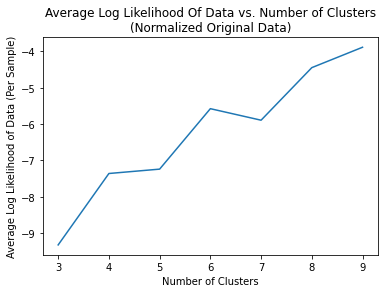

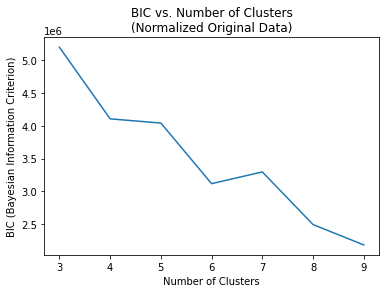

In [87]:
# plotting the BIC curve
def plot_graph(title,
                y_values,
                x_values,
                x_axis_label,
                y_axis_label):
    """
    Purpose: For easy plotting
    """
    fig,ax = plt.subplots(1,1)
    ax.plot(x_values,y_values)
    ax.set_xlabel(x_axis_label)
    ax.set_ylabel(y_axis_label)
    ax.set_title(title)
    plt.show()

cluster_values = list(scaled_original_results.keys())
cluster_labels = "Number of Clusters"
title_suffix = f"\n(Normalized Original Data)"


plot_graph(
    title = "Average Log Likelihood Of Data vs. Number of Clusters" + title_suffix,
    y_values = [scaled_original_results[K]["log_likelihood"] for K in cluster_values],
    x_values = cluster_values,
    x_axis_label = cluster_labels,
    y_axis_label = "Average Log Likelihood of Data (Per Sample)",
)


plot_graph(
    title = "BIC vs. Number of Clusters" + title_suffix,
    y_values = [scaled_original_results[K]["bic_value"] for K in cluster_values],
    x_values = cluster_values,
    x_axis_label = cluster_labels,
    y_axis_label = "BIC (Bayesian Information Criterion)",
)


In [184]:
X_train.columns

Index(['n0_width_median_mesh_center', 'n0_width_no_spine_median_mesh_center',
       'n0_n_spines', 'n0_total_spine_volume', 'n0_spine_volume_median',
       'n0_spine_volume_density', 'n0_skeletal_length', 'n0_parent_angle',
       'n0_sibling_angle', 'n1_width_median_mesh_center',
       'n1_width_no_spine_median_mesh_center', 'n1_n_spines',
       'n1_total_spine_volume', 'n1_spine_volume_median',
       'n1_spine_volume_density', 'n1_skeletal_length', 'n1_parent_angle',
       'n1_sibling_angle'],
      dtype='object')

# Calculating How it Does on the Classified Data

In [147]:
def clustering_stats(data,clust_perc=0.80):
    # categories = ["Apical","Basal","Axon"]
    # classifications = ["hard","soft"]
    # clust_perc = 0.8

    classifications = list(data.keys())
    categories = list(data[classifications[0]].keys())

    stats_dict_by_classification = dict()

    for curr_classification in classifications:
        stats_dict = dict()

        total_per_cluster_by_category = [data[curr_classification][c] for c in categories]
        total_per_cluster = np.sum(total_per_cluster_by_category,axis=0)
        for curr_category in categories:
            local_stats_dict = dict()

            count_data = data[curr_classification][curr_category]



            """
            Statistics to find:
            1) The cluster with the most of that label and the % in that cluster
            2) The number of clusters needed to comprise 80% of labeled group
            3) The purity measurements

            Pseudocode: 
            1) get the total number items put in each cluster across all categories
            2) For each cluster:
            a. Multiply the perc in that cluster * (curent number in that cluster/total number in that cluster)


            """


            sorted_labels = np.flip(np.argsort(count_data))
            highest_cluster_perc = count_data[sorted_labels[0]]/np.sum(count_data)

            local_stats_dict["highest_cluster"]  = sorted_labels[0]
            local_stats_dict["highest_cluster_perc"] = highest_cluster_perc


            sorted_labels_cumsum_perc = np.cumsum(count_data[sorted_labels]/np.sum(count_data))
            perc_per_cluster = count_data/np.sum(count_data)

            n_clusters = np.digitize(clust_perc,sorted_labels_cumsum_perc)+1
            local_stats_dict[f"n_clusters_{np.floor(clust_perc*100)}"] = n_clusters

            #find the purity metric

            purity = np.sum(perc_per_cluster*count_data/total_per_cluster)

            local_stats_dict["purity"] = purity

            stats_dict[curr_category] = local_stats_dict

        # measure the purity of each cluster
        cluster_purity = np.max(total_per_cluster_by_category,axis=0)/np.sum(total_per_cluster_by_category,axis=0)
        cluster_purity

        stats_dict_by_classification[curr_classification] = dict(cluster_purity= cluster_purity,stats_dict=stats_dict)
    return stats_dict_by_classification

4

In [179]:
curr_K = 4
model = scaled_original_results[curr_K]["model"]
labeled_data = dict(
                    #Total = data_total_scaled,
                     Axon=axon_data_scaled,
                     Basal=basal_data_scaled,
                     Apical=apical_data_scaled
)


total_hard = []
total_soft = []

classification_types = ["hard","soft"]

verbose = False
labeled_data_classification = dict()
dicts_for_classif_df = []

for c_type in classification_types:
    
    if verbose:
        print(f"\nclassification_type={c_type}")
    labeled_data_classification[c_type]=dict()
    
    for k,v in labeled_data.items():
        
        if verbose:
            print(f"{k}")
        
        curr_class = gmm_classification(model,v,classification=c_type,verbose=verbose)
        labeled_data_classification[c_type][k] = curr_class
        
        classifier_dict = dict()
        classifier_dict["classification"]=c_type
        classifier_dict["category"]=k
        classif_dict_up = dict([(f"cluster_{i}",np.round(bb,1)) for i,bb in enumerate(curr_class)])
        classifier_dict.update(classif_dict_up)
        
        dicts_for_classif_df.append(classifier_dict)

# Print out the classification Numbers in Easy to See Dataframe
df_class = pd.DataFrame.from_dict(dicts_for_classif_df)
df_class.style.set_caption(f"Clustering Numbers By Neuroscience Category for K = {model.n_components}")
df_class.sort_values(by=['category'])



,classification,category,cluster_0,cluster_1,cluster_2,cluster_3
2,hard,Apical,2674.0,1193.0,3539.0,594.0
5,soft,Apical,2675.3,1173.9,3548.4,602.4
0,hard,Axon,903.0,6070.0,741.0,286.0
3,soft,Axon,902.8,6065.3,748.6,283.3
1,hard,Basal,3387.0,1793.0,2197.0,623.0
4,soft,Basal,3387.3,1785.6,2202.5,624.6


In [246]:
ret_stats

{'hard': {'cluster_purity': array([0.48635841, 0.67027385, 0.54639494, 0.41450432]),
  'stats_dict': {'Axon': {'highest_cluster': 1,
    'highest_cluster_perc': 0.75875,
    'n_clusters_80.0': 2,
    'purity': 0.5406059055615006},
   'Basal': {'highest_cluster': 0,
    'highest_cluster_perc': 0.423375,
    'n_clusters_80.0': 3,
    'purity': 0.3757189580570914},
   'Apical': {'highest_cluster': 2,
    'highest_cluster_perc': 0.442375,
    'n_clusters_80.0': 3,
    'purity': 0.41904443469015895}}},
 'soft': {'cluster_purity': array([0.48629963, 0.6720735 , 0.54595613, 0.41357302]),
  'stats_dict': {'Axon': {'highest_cluster': 1,
    'highest_cluster_perc': 0.758160764832448,
    'n_clusters_80.0': 2,
    'purity': 0.5415873270068527},
   'Basal': {'highest_cluster': 0,
    'highest_cluster_perc': 0.42341327725354727,
    'n_clusters_80.0': 3,
    'purity': 0.3756521742766262},
   'Apical': {'highest_cluster': 2,
    'highest_cluster_perc': 0.4435504487085462,
    'n_clusters_80.0': 3,
 

In [167]:
# Assemble The statistics and Visualize in Dataframe
"""
Purpose: Just want to visualize the soft and the hard assignment (and show they are not that different)

Pseudocode: 
1) 

"""

ret_stats = clustering_stats(labeled_data_classification)

dict_for_df = [] 

for cl_type,cl_data in ret_stats.items():
    curr_stats_dict = cl_data["stats_dict"]
    
    for cat_name,cat_stats_dict in curr_stats_dict.items():
        cat_local_dict = copy.copy(cat_stats_dict)
        cat_local_dict["category"] = cat_name
        cat_local_dict["classification"] = cl_type
        dict_for_df.append(cat_local_dict)
df = pd.DataFrame.from_dict(dict_for_df)
df.sort_values(by=['category'])
df.style.set_caption(f"Clustering Advanced Statistics By Neuroscience Category for K = {curr_K}")

,highest_cluster,highest_cluster_perc,n_clusters_80.0,purity,category,classification
0,1,0.758750,2,0.540606,Axon,hard
1,0,0.423375,3,0.375719,Basal,hard
2,2,0.442375,3,0.419044,Apical,hard
3,1,0.758161,2,0.541587,Axon,soft
4,0,0.423413,3,0.375652,Basal,soft
5,2,0.443550,3,0.419722,Apical,soft


# Doing without normalization

In [ ]:
df_filtered_unscaled = df_filtered[columns_picked]

In [ ]:
axon_data_unscaled = df_filtered_unscaled.iloc[axon_indices]
basal_data_unscaled = df_filtered_unscaled.iloc[basal_indices]
apical_data_unscaled = df_filtered_unscaled.iloc[apical_indices]
data_total_unscaled = copy.copy(df_filtered_unscaled)

print(f"# apical paths = {len(axon_data_scaled)}\n",
     f"# basal paths = {len(basal_data_scaled)}\n",
     f"# axon paths = {len(apical_data_scaled)}\n")

In [ ]:
K = 3
covariance_type = "full"

st_time = time.time()

#1) Training the GMM
gmm_unscald = mixture.GaussianMixture(n_components=K, 
                              covariance_type=covariance_type,
                             reg_covar=0.1,
                             init_params="kmeans")
gmm.fit(data_total_unscaled)

# Getting the Average Log likelihood:
average_log_likelihood_train = gmm.score(data_total_unscaled)
print(f"Convergence status = {gmm.converged_}")
print(f"Total time for GMM = {time.time() - st_time}")


In [ ]:
gmm_classification(gmm,data_total_unscaled)
gmm_classification(gmm,axon_data_unscaled)
gmm_classification(gmm,basal_data_unscaled)
gmm_classification(gmm,apical_data_unscaled)

In [ ]:
recov_unscaled = pd.DataFrame(gmm.means_)
recov_unscaled.columns = columns_picked
recov_unscaled

# Try Doing it On PCA (full components)

In [ ]:
data_v = data_df_normalized.to_numpy()
data_v.shape

In [ ]:
dr = reload(dr)
data_analyzed = dr.pca_analysis(data_v,
                                n_components=data_v.shape[-1],
                                whiten=True,
                                plot_sqrt_eigvals=True)

In [ ]:
dr.plot_variance_explained(data_analyzed)

In [ ]:
data_analyzed["percent_variance_explained_up_to_n_comp"]

In [ ]:
axon_data_pca = data_analyzed["data_proj"][axon_indices]
basal_data_pca = data_analyzed["data_proj"][basal_indices]
apical_data_pca = data_analyzed["data_proj"][apical_indices]
data_total_pca = data_analyzed["data_proj"]

In [ ]:
# Doing the GMM
K = 4
covariance_type = "full"
curr_data = data_total_pca

st_time = time.time()

#1) Training the GMM
gmm = mixture.GaussianMixture(n_components=K, 
                              covariance_type=covariance_type,
                             reg_covar=0.000001,
                             init_params="kmeans")
gmm.fit(curr_data)

# Getting the Average Log likelihood:
average_log_likelihood_train = gmm.score(curr_data)
print(f"Average Log likelihood = {average_log_likelihood_train}")
print(f"Convergence status = {gmm.converged_}")
print(f"Total time for GMM = {time.time() - st_time}")


In [ ]:
gmm_classification(gmm,data_total_pca)
gmm_classification(gmm,axon_data_pca)
gmm_classification(gmm,basal_data_pca)
gmm_classification(gmm,apical_data_pca)

In [ ]:
gmm_means_inverse = data_analyzed["pca_obj"].inverse_transform(gmm.means_)
rec_means = pd.DataFrame(scaler.inverse_transform(gmm_means_inverse))
rec_means.columns = columns_picked
rec_means

In [255]:
dir(fig1)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_add_axes_internal',
 '_agg_filter',
 '_align_xlabel_grp',
 '_align_ylabel_grp',
 '_alpha',
 '_animated',
 '_axobservers',
 '_axstack',
 '_cachedRenderer',
 '_clipon',
 '_clippath',
 '_constrained',
 '_constrained_layout_pads',
 '_contains',
 '_default_contains',
 '_dpi',
 '_gci',
 '_get_clipping_extent_bbox',
 '_get_dpi',
 '_gid',
 '_gridspecs',
 '_in_layout',
 '_label',
 '_layoutbox',
 '_make_key',
 '_mouseover',
 '_normalize_grid_string',
 '_oid',
 '_path_effects',
 '_picker',
 '_process_projection_requirements',
 '_propobservers',
 '_rasterized',
 '_remove_method',
 '_repr_html_',
 '

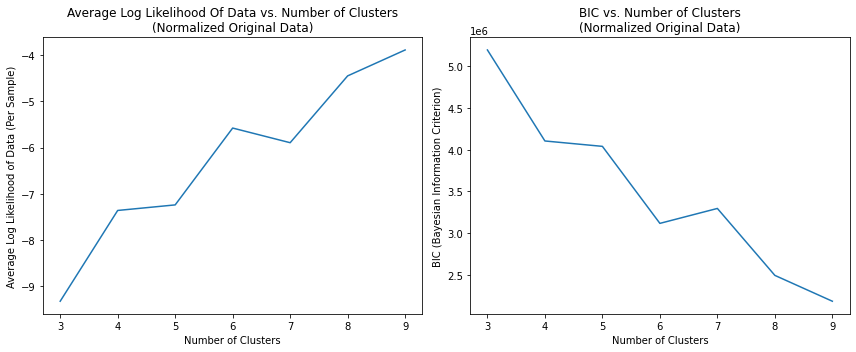

In [257]:
from IPython.display import display
display(fig1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  """Entry point for launching an IPython kernel.


# Try Doing it On PCA (with reduced components)`

In [ ]:
data_v = data_total_scaled.to_numpy()
data_v.shape

In [ ]:
dr = reload(dr)
data_analyzed = dr.pca_analysis(data_v,
                                n_components=4,
                                whiten=True,
                                plot_sqrt_eigvals=False)

In [ ]:
data_analyzed["percent_variance_explained_up_to_n_comp"][3]

In [ ]:
axon_data_pca = data_analyzed["data_proj"][axon_indices]
basal_data_pca = data_analyzed["data_proj"][basal_indices]
apical_data_pca = data_analyzed["data_proj"][apical_indices]
data_total_pca = data_analyzed["data_proj"]


In [ ]:
# Doing the GMM
K = 4
covariance_type = "full"
curr_data = data_total_pca

st_time = time.time()

#1) Training the GMM
gmm = mixture.GaussianMixture(n_components=K, 
                              covariance_type=covariance_type,
                             reg_covar=0.000001,
                             init_params="kmeans")
gmm.fit(curr_data)

# Getting the Average Log likelihood:
average_log_likelihood_train = gmm.score(curr_data)
print(f"Average Log likelihood = {average_log_likelihood_train}")
print(f"Convergence status = {gmm.converged_}")
print(f"Total time for GMM = {time.time() - st_time}")


In [ ]:
gmm_classification(gmm,data_total_pca)
gmm_classification(gmm,axon_data_pca)
gmm_classification(gmm,basal_data_pca)
gmm_classification(gmm,apical_data_pca)

In [ ]:
gmm_means_inverse = data_analyzed["pca_obj"].inverse_transform(gmm.means_)
rec_means = pd.DataFrame(scaler.inverse_transform(gmm_means_inverse))
rec_means.columns = columns_picked
rec_means

# Get the statistics on the different groups 

In [ ]:
# getting the mean of a lot of properties

df_to_analyze = df_filtered[columns_picked]

basal_indices = indices_of_soma_angle(df_filtered,[100,115])
axon_indices = indices_of_soma_angle(df_filtered,[165,180])
apical_indices = indices_of_soma_angle(df_filtered,[0,20])

# Apical Analysis

In [ ]:
axes

In [ ]:
row

In [ ]:
dir(fig)

In [ ]:
def plot_table_histograms(tables_to_plot,tables_labels,fig_title=None):
    curr_table = apical_table

    fig,axes = plt.subplots(5,4)
    fig.set_size_inches(18.5, 10.5)
    fig.tight_layout()
    
    if not fig_title is None:
        fig.title(fig_title)

    
    for j,col_title in enumerate(curr_table):
        row = np.floor(j/4).astype("int")
        column = j - row*4
        ax = axes[row,column]
        ax.set_title(col_title)
        
        for curr_table,curr_table_name in zip(tables_to_plot,tables_labels):
            curr_data = curr_table[col_title].to_numpy()
            ax.hist(curr_data,bins=50,label=curr_table_name,alpha=0.4,density=True)
            
        ax.legend()

        
apical_table = df_to_analyze.iloc[apical_indices]
basal_table = df_to_analyze.iloc[basal_indices]
axon_table = df_to_analyze.iloc[axon_indices]
plot_table_histograms([apical_table,basal_table,axon_table],["apical","basal","axon"])

In [ ]:
plt.hist(apical_table["n0_parent_angle"].to_numpy(),density=True,bins=50)

# Variational Inference

In [ ]:
from os import sys
sys.path.append("/notebooks/Neurosignal_Final/PRML/")

In [ ]:
from prml.rv import VariationalGaussianMixture

In [ ]:
vgmm = VariationalGaussianMixture(n_components=6)